# Retail Lab (Data Transformation Stage)

**Learning Objectives:**
  * Practice basic statistical analysis techniques
  * Gain exposure to retail related DataSets

## Context of the datasets

### 1. There are three datasets: `articles.csv.zip`, `customers.csv.zip` and `transactions2020.csv.zip`

#### 2. The Articles dataset contains information over products available.
#### 3. The Customers dataset contains information over registered customers.
#### 4. The Transactions dataset contains purchases of articles made by customers.



## 1. Library Import

In [ ]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
warnings.simplefilter('ignore')

## 2. Data loading and DataFrame creation

In [ ]:
Articles=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/articles.csv.zip")

In [ ]:
Articles.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [ ]:
Articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [ ]:
Customers=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/customers.csv.zip")

In [ ]:
Customers.sample(3)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
18718,03840727c256be792a3543f7d8d966e3d2a01134b62c5c...,NaN,NaN,ACTIVE,NONE,52.0,e8978c813b62f60b67281db783fd1e437689ede2a24ddd...
1011053,bcae3785377e4be25bd89339ed4a78ca5c589fd1cd4512...,1.0,1.0,ACTIVE,Regularly,30.0,179b1501b2a1620ab0e43f18e51b2c6bf4945e79f778eb...
1084271,ca5a7ca17ee660468078d7f29a414ea59bcfe83ee275ad...,1.0,1.0,ACTIVE,Regularly,49.0,39bb32ab98ec90542854d8b482f057b1ede6a692324680...


In [ ]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355969 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [ ]:
Transactions=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/transactions2020.csv.zip")

In [ ]:
Transactions.sample(3)

,t_dat,customer_id,article_id,price,sales_channel_id
1116372,2020-06-22,49a3aa71b5ed9effe35ea70188bb9e411fe3c62a52a748...,751471031,0.033881,1
731437,2020-06-17,4d8b1fb46a97cd1cb3194dc681e846d381a27841da1025...,300024058,0.022864,2
2161746,2020-07-09,3b5582a29de8fa0cb696407dce3f98bc77a026557cf8aa...,822344012,0.032644,2


In [ ]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5151470 entries, 0 to 5151469
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 196.5+ MB


## 3. Merging DataFrames

#### 3.1. Transactions-Articles


In [ ]:
Transactions.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2020-06-01,00075ef36696a7b4ed8c83e22a4bf7ea7c90ee110991ec...,844198001,0.016932,2
1,2020-06-01,000b31552d3785c79833262bbeefa484cbc43d7b612b3c...,777016001,0.030492,1
2,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,820507001,0.010153,2


In [ ]:
Articles.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [ ]:
## we merge both DataFrames using the common key: article_id. We store the result in a new DataFrame
TransactionsAndArticles=pd.merge(Transactions, Articles, how='left',on='article_id')

#### 3.2. Transactions-Articles-Customers

In [ ]:
TransactionsAndArticles.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,2020-06-01,00075ef36696a7b4ed8c83e22a4bf7ea7c90ee110991ec...,844198001,0.016932,2,844198,Saturn trs (J),296,Pyjama bottom,Nightwear,...,Nightwear,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1017,"Under-, Nightwear",Pyjama bottoms in sweatshirt fabric with wide ...
1,2020-06-01,000b31552d3785c79833262bbeefa484cbc43d7b612b3c...,777016001,0.030492,1,777016,Cisco skirt,275,Skirt,Garment Lower body,...,Trousers & Skirt,A,Ladieswear,1,Ladieswear,18,Womens Trend,1009,Trousers,"Calf-length skirt in softly draping, patterned..."
2,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,820507001,0.010153,2,820507,Charlotte Hipster Primula,286,Underwear bottom,Underwear,...,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Hipster briefs in lace with a mid waist, lined..."


In [ ]:
Customers.head(3)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...


In [ ]:
## we merge both DataFrames using the common key: customer_id. We store the result in a new DataFrame
TransactionsAndArticlesAndCustomers=pd.merge(TransactionsAndArticles, Customers, how='left',on='customer_id')

In [ ]:
TransactionsAndArticlesAndCustomers.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,2020-06-01,00075ef36696a7b4ed8c83e22a4bf7ea7c90ee110991ec...,844198001,0.016932,2,844198,Saturn trs (J),296,Pyjama bottom,Nightwear,...,"Womens Nightwear, Socks & Tigh",1017,"Under-, Nightwear",Pyjama bottoms in sweatshirt fabric with wide ...,NaN,NaN,ACTIVE,NONE,40.0,0c0e15f8fa88a1d4aa6ca8a0b4a8289ca1affbaebdea22...
1,2020-06-01,000b31552d3785c79833262bbeefa484cbc43d7b612b3c...,777016001,0.030492,1,777016,Cisco skirt,275,Skirt,Garment Lower body,...,Womens Trend,1009,Trousers,"Calf-length skirt in softly draping, patterned...",1.0,1.0,ACTIVE,Regularly,59.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
2,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,820507001,0.010153,2,820507,Charlotte Hipster Primula,286,Underwear bottom,Underwear,...,Womens Lingerie,1017,"Under-, Nightwear","Hipster briefs in lace with a mid waist, lined...",NaN,NaN,ACTIVE,NONE,23.0,8d4ceb946237cf52ce5c2a1a71d1221fde77627a52d661...


In [ ]:
TransactionsAndArticlesAndCustomers.sample(3).T

,1028223,845732,986718
t_dat,2020-06-20,2020-06-18,2020-06-20
customer_id,da8aeddbad1b3edcfd7180e3c799cd7faef8736c59abcf...,6f84e8d58accf121d377c386235ef0a7806c467a6af31f...,3d2654339bf5e2169f831dcd46660bc6a7397696ce050c...
article_id,700701001,859205002,852498001
price,0.019051,0.019814,0.035576
sales_channel_id,1,2,1
product_code,700701,859205,852498
prod_name,OP T-shirt Milano,Deer tee,Tiana jumpsuit
product_type_no,-1,255,272
product_type_name,Unknown,T-shirt,Trousers
product_group_name,Unknown,Garment Upper body,Garment Lower body


In [ ]:
TransactionsAndArticlesAndCustomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5151470 entries, 0 to 5151469
Data columns (total 35 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   t_dat                         object 
 1   customer_id                   object 
 2   article_id                    int64  
 3   price                         float64
 4   sales_channel_id              int64  
 5   product_code                  int64  
 6   prod_name                     object 
 7   product_type_no               int64  
 8   product_type_name             object 
 9   product_group_name            object 
 10  graphical_appearance_no       int64  
 11  graphical_appearance_name     object 
 12  colour_group_code             int64  
 13  colour_group_name             object 
 14  perceived_colour_value_id     int64  
 15  perceived_colour_value_name   object 
 16  perceived_colour_master_id    int64  
 17  perceived_colour_master_name  object 
 18  department_no         

In [ ]:
del Articles, Customers, Transactions

In [ ]:
TransactionsAndArticlesAndCustomers.groupby('sales_channel_id').count()

,t_dat,customer_id,article_id,price,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
sales_channel_id,,,,,,,,,,,,,,,,,,,,,
1,1788396,1788396,1788396,1788396,1788396,1788396,1788396,1788396,1788396,1788396,...,1788396,1788396,1788396,1786791,817650,804129,1787640,1780039,1779148,1788396
2,3363074,3363074,3363074,3363074,3363074,3363074,3363074,3363074,3363074,3363074,...,3363074,3363074,3363074,3361065,1502625,1482103,3356625,3358923,3352518,3363074


In [ ]:
TransactionsAndArticlesAndCustomers.groupby('department_name').count()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
department_name,,,,,,,,,,,,,,,,,,,,,
AK Bottoms,4400,4400,4400,4400,4400,4400,4400,4400,4400,4400,...,4400,4400,4400,4400,2128,2099,4389,4393,4382,4400
AK Dresses & Outdoor,2879,2879,2879,2879,2879,2879,2879,2879,2879,2879,...,2879,2879,2879,2879,1402,1365,2872,2874,2865,2879
AK Other,113,113,113,113,113,113,113,113,113,113,...,113,113,113,113,66,63,113,113,113,113
AK Tops Jersey & Woven,390,390,390,390,390,390,390,390,390,390,...,390,390,390,390,155,153,390,390,390,390
AK Tops Knitwear,392,392,392,392,392,392,392,392,392,392,...,392,392,392,392,183,180,390,391,391,392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Girl Shoes,380,380,380,380,380,380,380,380,380,380,...,380,380,380,380,183,181,380,379,380,380
Young Girl Swimwear,699,699,699,699,699,699,699,699,699,699,...,699,699,699,699,337,330,699,697,698,699
Young Girl Trouser,952,952,952,952,952,952,952,952,952,952,...,952,952,952,952,483,477,951,952,943,952


In [ ]:
TransactionsAndArticlesAndCustomers.groupby('section_name').count()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_no,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
section_name,,,,,,,,,,,,,,,,,,,,,
Baby Boy,6048,6048,6048,6048,6048,6048,6048,6048,6048,6048,...,6048,6048,6048,6048,2733,2697,6019,6018,6016,6048
Baby Essentials & Complements,16504,16504,16504,16504,16504,16504,16504,16504,16504,16504,...,16504,16504,16504,16504,6847,6739,16421,16413,16390,16504
Baby Girl,5482,5482,5482,5482,5482,5482,5482,5482,5482,5482,...,5482,5482,5482,5482,2743,2685,5458,5456,5445,5482
Boys Underwear & Basics,6105,6105,6105,6105,6105,6105,6105,6105,6105,6105,...,6105,6105,6105,6097,2906,2854,6079,6079,6069,6105
Collaborations,1611,1611,1611,1611,1611,1611,1611,1611,1611,1611,...,1611,1611,1611,1611,791,774,1607,1610,1602,1611
Contemporary Casual,30348,30348,30348,30348,30348,30348,30348,30348,30348,30348,...,30348,30348,30348,30348,14000,13820,30322,30283,30223,30348
Contemporary Smart,46340,46340,46340,46340,46340,46340,46340,46340,46340,46340,...,46340,46340,46340,46340,21878,21607,46290,46232,46158,46340
Contemporary Street,28180,28180,28180,28180,28180,28180,28180,28180,28180,28180,...,28180,28180,28180,28180,13643,13410,28155,28113,28079,28180
Denim Men,26376,26376,26376,26376,26376,26376,26376,26376,26376,26376,...,26376,26376,26376,26376,12262,12113,26351,26338,26264,26376


## 4. Basic Statistical Analysis
### In this section we will try to gather information on the distribution of:
#### (1) Dollars sold per Transaction
#### (2) Dollars sold  per Transactions and channel
#### (3) Dollars sold per Transaction and Section

#### 4.1. Dollars sold per Transaction
#### For any given transaction we observe the amount of Dollars sold.

In [ ]:
TransactionsAndArticlesAndCustomers[['t_dat','customer_id','article_id','price']]

,t_dat,customer_id,article_id,price
0,2020-06-01,00075ef36696a7b4ed8c83e22a4bf7ea7c90ee110991ec...,844198001,0.016932
1,2020-06-01,000b31552d3785c79833262bbeefa484cbc43d7b612b3c...,777016001,0.030492
2,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,820507001,0.010153
3,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,869811005,0.016932
4,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,823118004,0.025407
...,...,...,...,...
5151465,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305
5151466,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356
5151467,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203
5151468,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763


In [ ]:
TransactionsAndArticlesAndCustomers['price'].describe()

count    5.151470e+06
mean     2.627450e-02
std      1.741462e-02
min      3.389831e-05
25%      1.523729e-02
50%      2.286441e-02
75%      3.388136e-02
max      5.067797e-01
Name: price, dtype: float64

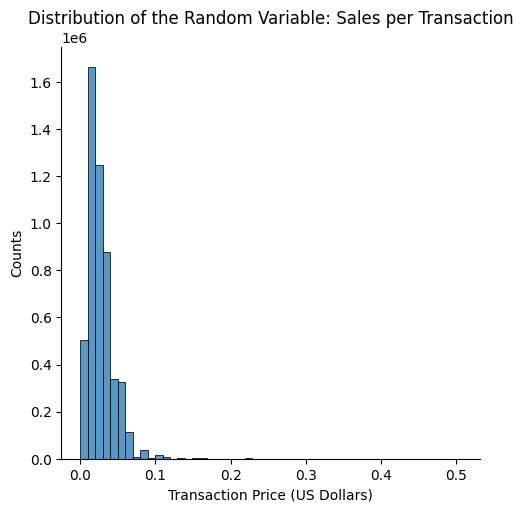

In [ ]:
sns.displot(TransactionsAndArticlesAndCustomers, x="price", binwidth=0.01)
plt.xlabel('Transaction Price (US Dollars)')
plt.ylabel('Counts')
plt.title('Distribution of the Random Variable: Sales per Transaction')
plt.show()

##

#### 4.2. Dollars sold per Transaction and channel
#### For any given transaction we observe the amount of Dollars sold accross channels. This is useful as it allows to establish comparisons of finantial performance accros channels

In [ ]:
TransactionsAndArticlesAndCustomers[['t_dat','customer_id','article_id','price','sales_channel_id']]

,t_dat,customer_id,article_id,price,sales_channel_id
0,2020-06-01,00075ef36696a7b4ed8c83e22a4bf7ea7c90ee110991ec...,844198001,0.016932,2
1,2020-06-01,000b31552d3785c79833262bbeefa484cbc43d7b612b3c...,777016001,0.030492,1
2,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,820507001,0.010153,2
3,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,869811005,0.016932,2
4,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,823118004,0.025407,2
...,...,...,...,...,...
5151465,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
5151466,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
5151467,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
5151468,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


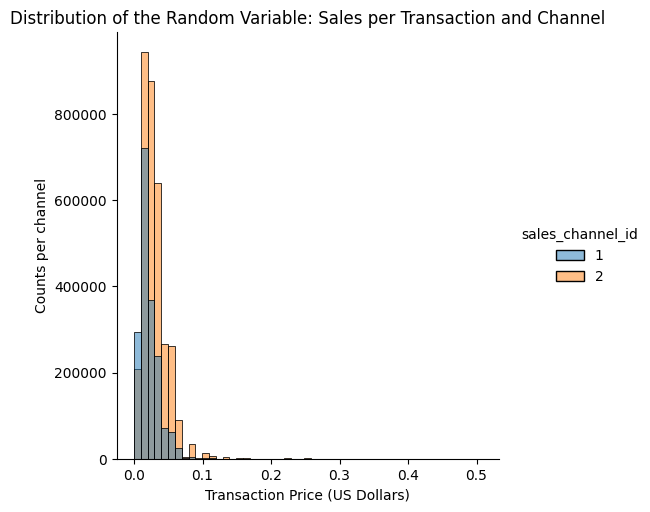

In [ ]:
sns.displot(TransactionsAndArticlesAndCustomers, x="price",hue='sales_channel_id', binwidth=0.01,palette='tab10')
plt.xlabel('Transaction Price (US Dollars)')
plt.ylabel('Counts per channel')
plt.title('Distribution of the Random Variable: Sales per Transaction and Channel')
plt.show()

#### The previous figure displays the distribution of Sales per Transaction for the two different channels: 1 and 2.
#### Based on the previous figure we conclude that channel 2 leads to higher dollars sold per transaction.

#### 4.2. Dollars sold per Transaction and Section
#### For any given transaction we observe the amount of Dollars sold accross channels. This is useful as it allows to establish comparisons of finantial performance accros channels

In [ ]:
TransactionsAndArticlesAndCustomers[['t_dat','customer_id','article_id','price','section_name']]

,t_dat,customer_id,article_id,price,section_name
0,2020-06-01,00075ef36696a7b4ed8c83e22a4bf7ea7c90ee110991ec...,844198001,0.016932,"Womens Nightwear, Socks & Tigh"
1,2020-06-01,000b31552d3785c79833262bbeefa484cbc43d7b612b3c...,777016001,0.030492,Womens Trend
2,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,820507001,0.010153,Womens Lingerie
3,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,869811005,0.016932,Womens Casual
4,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,823118004,0.025407,"Womens Swimwear, beachwear"
...,...,...,...,...,...
5151465,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,Divided Collection
5151466,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,Divided Collection
5151467,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,Womens Big accessories
5151468,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,Womens Small accessories


In [ ]:
TransactionsAndArticlesAndCustomers.value_counts('section_name').sort_values(ascending=False)

section_name
Womens Everyday Collection        942788
Divided Collection                565792
Womens Swimwear, beachwear        500869
Womens Lingerie                   387189
Womens Tailoring                  386600
Womens Everyday Basics            246948
Divided Basics                    237374
Ladies H&M Sport                  220096
Womens Casual                     207318
Ladies Denim                      159256
Womens Nightwear, Socks & Tigh    154580
Men Underwear                     132454
Womens Small accessories          132379
Womens Shoes                      105302
Womens Trend                       99686
H&M+                               93256
Womens Big accessories             66523
Divided Projects                   57125
Mama                               50632
Contemporary Smart                 46340
Womens Jackets                     36325
Divided Accessories                32575
Contemporary Casual                30348
Contemporary Street                28180
Den

#### We select the top 3 sections for clarity purposes

In [ ]:
Top3Sections=TransactionsAndArticlesAndCustomers.value_counts('section_name').sort_values(ascending=False).head(3)
Top3Sections

section_name
Womens Everyday Collection    942788
Divided Collection            565792
Womens Swimwear, beachwear    500869
Name: count, dtype: int64

In [ ]:
Top3Sections.index

Index(['Womens Everyday Collection', 'Divided Collection',
       'Womens Swimwear, beachwear'],
      dtype='object', name='section_name')

In [ ]:
Top3SectionsFilter=TransactionsAndArticlesAndCustomers['section_name'].isin(Top3Sections.index)

In [ ]:
TransactionsAndArticlesAndCustomersFiltered=TransactionsAndArticlesAndCustomers[Top3SectionsFilter]

In [ ]:
# we need to delete files to avoid RAM crashing
del TransactionsAndArticlesAndCustomers

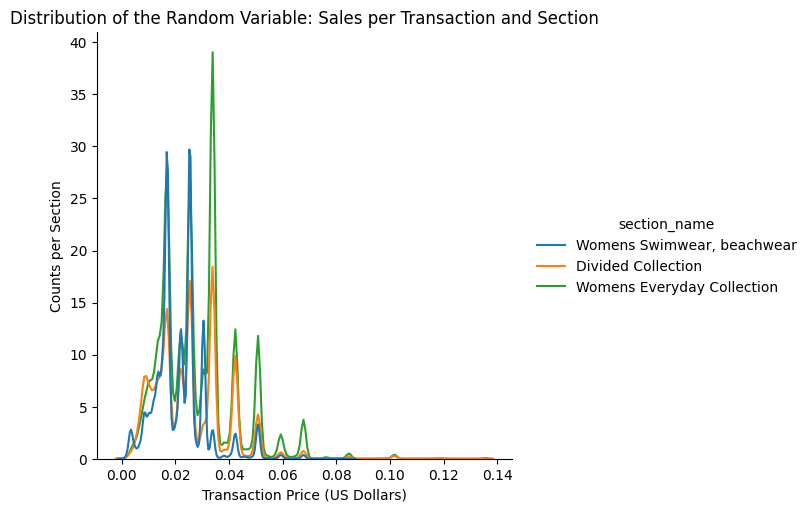

In [ ]:
sns.displot(TransactionsAndArticlesAndCustomersFiltered, x="price",hue='section_name', palette='tab10',kind='kde')
plt.xlabel('Transaction Price (US Dollars)')
plt.ylabel('Counts per Section')
plt.title('Distribution of the Random Variable: Sales per Transaction and Section')
plt.show()




<Axes: xlabel='section_name', ylabel='price'>

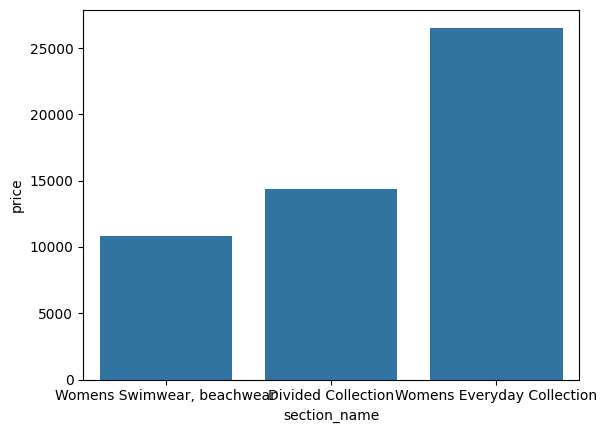

In [ ]:
sns.barplot(TransactionsAndArticlesAndCustomersFiltered,x='section_name',y='price',estimator='sum')

In [ ]:
TransactionsAndArticlesAndCustomersFiltered.groupby('section_name')['price'].sum()

section_name
Divided Collection            14368.467881
Womens Everyday Collection    26512.127441
Womens Swimwear, beachwear    10827.219441
Name: price, dtype: float64

#### Based on the previous figures we conclude that: (1) the secion named: "Womens Everyday Collection" leads to higher US Dollars sold per transaction and (2) this section also leads to larger overall sales